In [1]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [2]:
#sebelum import data dari kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rantimaulidaningsih","key":"62b79672c301928cb26f7e742ff8700a"}'}

In [3]:
!pip install -q kaggle

In [4]:
#mempersiapkan direktori untuk run kaggle
#!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
#download data dari kaggle
#!kaggle datasets download -d wangziang/waste-pictures
!kaggle datasets download -d rantimaulidaningsih/e-waste
#!kaggle datasets download -d kaustubh2402/ewaste-dataset

 99% 1.06G/1.08G [00:16<00:00, 35.4MB/s]
100% 1.08G/1.08G [00:16<00:00, 71.8MB/s]


In [6]:
#membuat directori
!mkdir data
!mkdir ./data/waste

In [7]:
#extrak zip file
import os
import zipfile

local_zip_2 ='./e-waste.zip'

zip_ref = zipfile.ZipFile(local_zip_2, 'r')

zip_ref.extractall('./data')

zip_ref.close()

In [8]:
import glob
import shutil
import os
def delete_all_xml_file (data_folder_path):
    for txtpath in glob.iglob(os.path.join(data_folder_path, '*.txt')):
      os.remove(txtpath)
      return txtpath

In [9]:
data_folder_path = './data/e-waste'
for i in range(len(os.listdir(data_folder_path))):
  delete_all_xml_file(data_folder_path)
for csvpath in glob.iglob(os.path.join(data_folder_path, '*.csv')):
  os.remove(csvpath)
for abcpath in glob.iglob(os.path.join(data_folder_path, 'abc.jpg')):
  os.remove(abcpath)

In [10]:
print(len(os.listdir('./data/e-waste')))

624


In [11]:
!git clone https://github.com/rli1215/Recycling-Image-Classification.git

Cloning into 'Recycling-Image-Classification'...
remote: Enumerating objects: 2985, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 2985 (delta 47), reused 24 (delta 14), pack-reused 2902
Receiving objects: 100% (2985/2985), 145.06 MiB | 19.97 MiB/s, done.
Resolving deltas: 100% (70/70), done.
Updating files: 100% (2729/2729), done.


Ngolah data sampah biasa 

In [12]:
def move_all_file (data_folder_path, path):
    for jpgpath in glob.iglob(os.path.join(data_folder_path, '*.jpg')):
      shutil.move(jpgpath, path)
      return jpgpath
waste_1= '/content/Recycling-Image-Classification/dataset-resized/glass'
waste_2= '/content/Recycling-Image-Classification/dataset-resized/plastic'
path = '/content/data/waste'
for i in range(len(os.listdir(waste_1))):
  move_all_file(waste_1, path)
print(len(os.listdir(path)))
for i in range(len(os.listdir(waste_2))):
  move_all_file(waste_2, path)
print(len(os.listdir(path)))

501
983


In [13]:
for jpgpath in glob.iglob(os.path.join('./data/waste/', '*.jpg')):
  if len(os.listdir('./data/waste')) > 624:
    os.remove(jpgpath)
print(len(os.listdir('./data/waste')))

624


In [14]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
!mkdir ./e-waste_filtered
import splitfolders
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("./data", output="./e-waste_filtered",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=True)

Copying files: 1248 files [00:00, 19801.29 files/s]


Let's find out the total number of waste and e-waste images in the `train` and `validation` directories:

In [16]:
base_dir = './e-waste_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training e-wasste/waste pictures
train_waste_dir = os.path.join(train_dir, 'e-waste')
train_ewaste_dir = os.path.join(train_dir, 'waste')

# Directory with our validation e-waste/waste pictures
validation_waste_dir = os.path.join(validation_dir, 'e-waste')
validation_ewaste_dir = os.path.join(validation_dir, 'waste')

# Directory with our testing e-waste/waste pictures
test_waste_dir = os.path.join(test_dir, 'e-waste')
test_ewaste_dir = os.path.join(test_dir, 'waste')

In [17]:
train_waste_fnames = os.listdir( train_waste_dir )
train_ewaste_fnames = os.listdir( train_ewaste_dir )
print(train_waste_fnames[:10])
print(train_ewaste_fnames[:10])

['IMG_20200329_152836.jpg', '257.jpeg', '552.jpg', '302.jpeg', 'IMG_20200329_152635.jpg', '598.jpeg', '800.jpeg', '570.jpg', '510.jpeg', '637.jpeg']
['glass386.jpg', 'glass24.jpg', 'glass249.jpg', 'glass153.jpg', 'plastic478.jpg', 'glass451.jpg', 'plastic94.jpg', 'glass131.jpg', 'glass315.jpg', 'plastic314.jpg']


Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, we configure the `matplotlib` parameters:

In [18]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

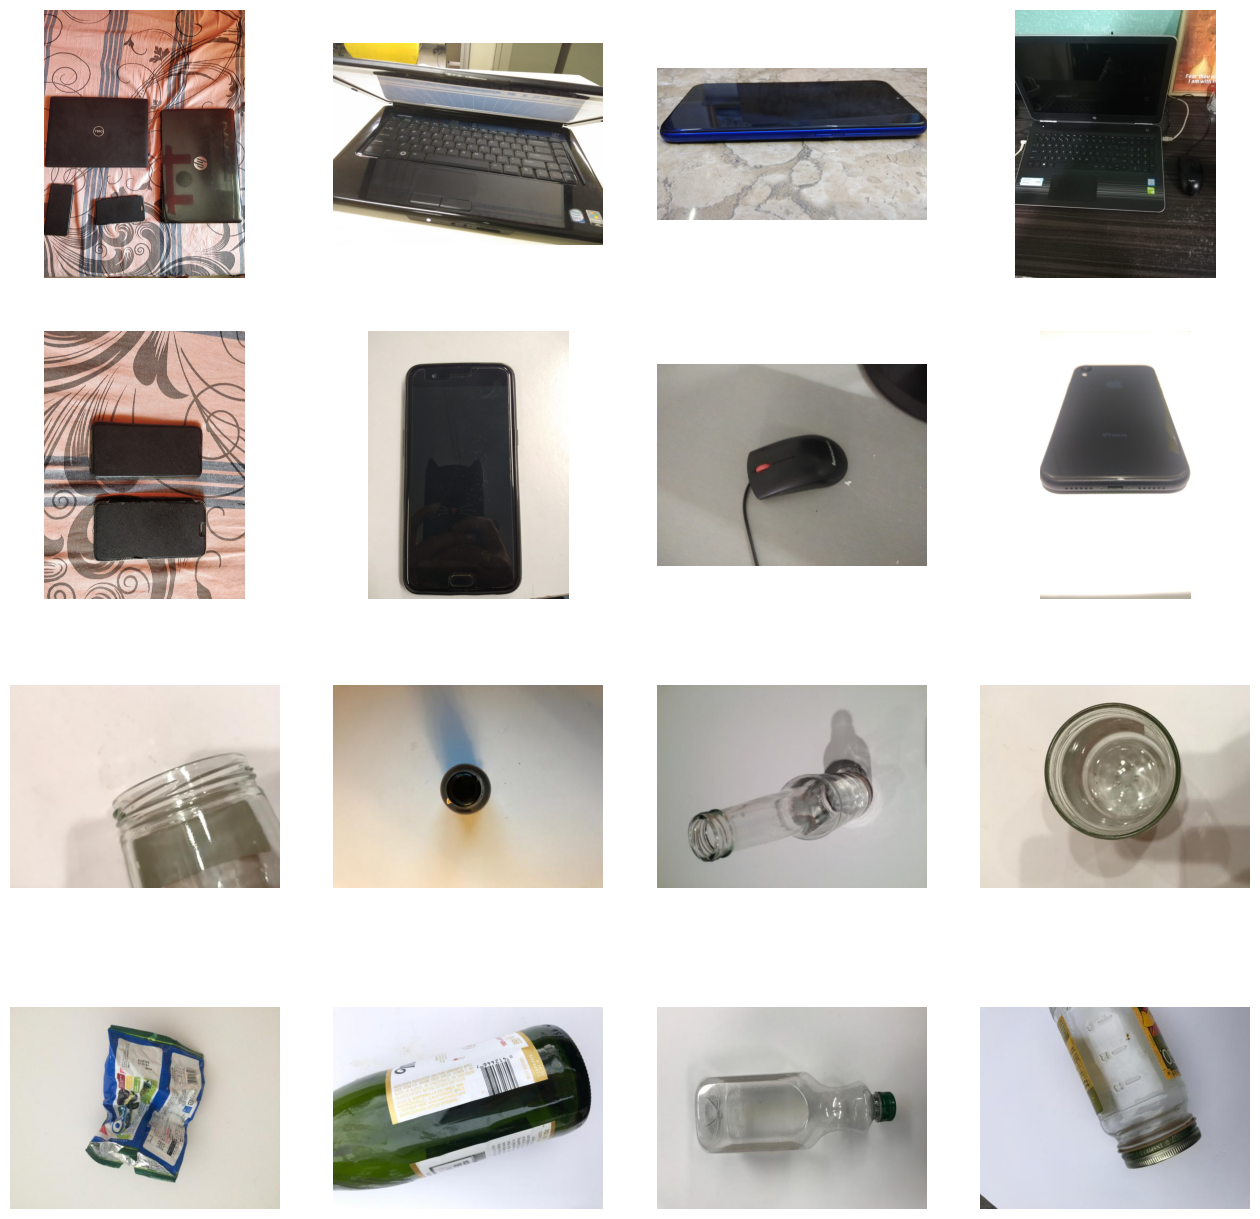

In [19]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_waste_pix = [os.path.join(train_waste_dir, fname) 
                for fname in train_waste_fnames[ pic_index-8:pic_index] 
               ]

next_ewaste_pix = [os.path.join(train_ewaste_dir, fname) 
                for fname in train_ewaste_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_waste_pix+next_ewaste_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1/255.0, 
        rotation_range=40,
        height_shift_range=0.2,
        width_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
valid_datagen  = ImageDataGenerator(rescale = 1/255.0, 
        rotation_range=40,
        height_shift_range=0.2,
        width_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
test_datagen  = ImageDataGenerator(rescale = 1/255.0)
# --------------------
# Flow training images in batches of 32 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(
    directory="./e-waste_filtered/train",
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
)
# --------------------
# Flow validation images in batches of 32 using test_datagen generator
# --------------------
valid_generator = valid_datagen.flow_from_directory(
    directory="./e-waste_filtered/val",
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42
)
# --------------------
# Flow test images in batches of 1 using test_datagen generator
# --------------------
test_generator = test_datagen.flow_from_directory(
    directory="./e-waste_filtered/test",
    target_size=(256, 256),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 998 images belonging to 2 classes.
Found 124 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


TRY SOME MODEL

In [21]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(units=64, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('waste') and 1 for the other ('e-waste')
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [23]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
History = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

Epoch 1/10
31/31 [==============================] - 114s 3s/step - loss: 0.6107 - accuracy: 0.6832 - val_loss: 0.3650 - val_accuracy: 0.8854
Epoch 2/10
31/31 [==============================] - 83s 3s/step - loss: 0.2839 - accuracy: 0.8831 - val_loss: 0.1681 - val_accuracy: 0.9271
Epoch 3/10
31/31 [==============================] - 81s 3s/step - loss: 0.2179 - accuracy: 0.9172 - val_loss: 0.1264 - val_accuracy: 0.9479
Epoch 4/10
31/31 [==============================] - 79s 3s/step - loss: 0.2682 - accuracy: 0.8954 - val_loss: 0.1401 - val_accuracy: 0.9479
Epoch 5/10
31/31 [==============================] - 80s 3s/step - loss: 0.2403 - accuracy: 0.9068 - val_loss: 0.1452 - val_accuracy: 0.9583
Epoch 6/10
31/31 [==============================] - 79s 3s/step - loss: 0.1974 - accuracy: 0.9327 - val_loss: 0.1186 - val_accuracy: 0.9792
Epoch 7/10
31/31 [==============================] - 79s 3s/step - loss: 0.2003 - accuracy: 0.9306 - val_loss: 0.1323 - val_accuracy: 0.9583
Epoch 8/10
31/31 [=

In [24]:
model.evaluate(valid_generator,
steps=STEP_SIZE_VALID)

3/3 [==============================] - 7s 3s/step - loss: 0.0582 - accuracy: 0.9896


[0.058222442865371704, 0.9895833134651184]

### Evaluating Accuracy and Loss for the Model

Let's plot the training/validation accuracy and loss as collected during training:

Text(0.5, 1.0, 'Training and validation loss')

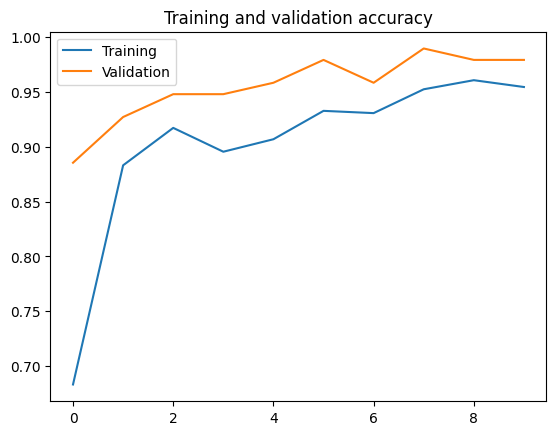

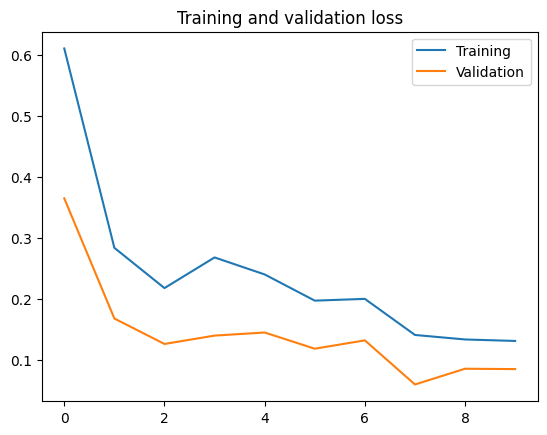

In [25]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = History.history[     'accuracy' ]
val_acc  = History.history[ 'val_accuracy' ]
loss     = History.history[    'loss' ]
val_loss = History.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

<ipython-input-28-b6fe270303e4>:39: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator, len(test_generator))


Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

     e-waste       0.98      0.95      0.97        63
       waste       0.95      0.98      0.97        63

    accuracy                           0.97       126
   macro avg       0.97      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126



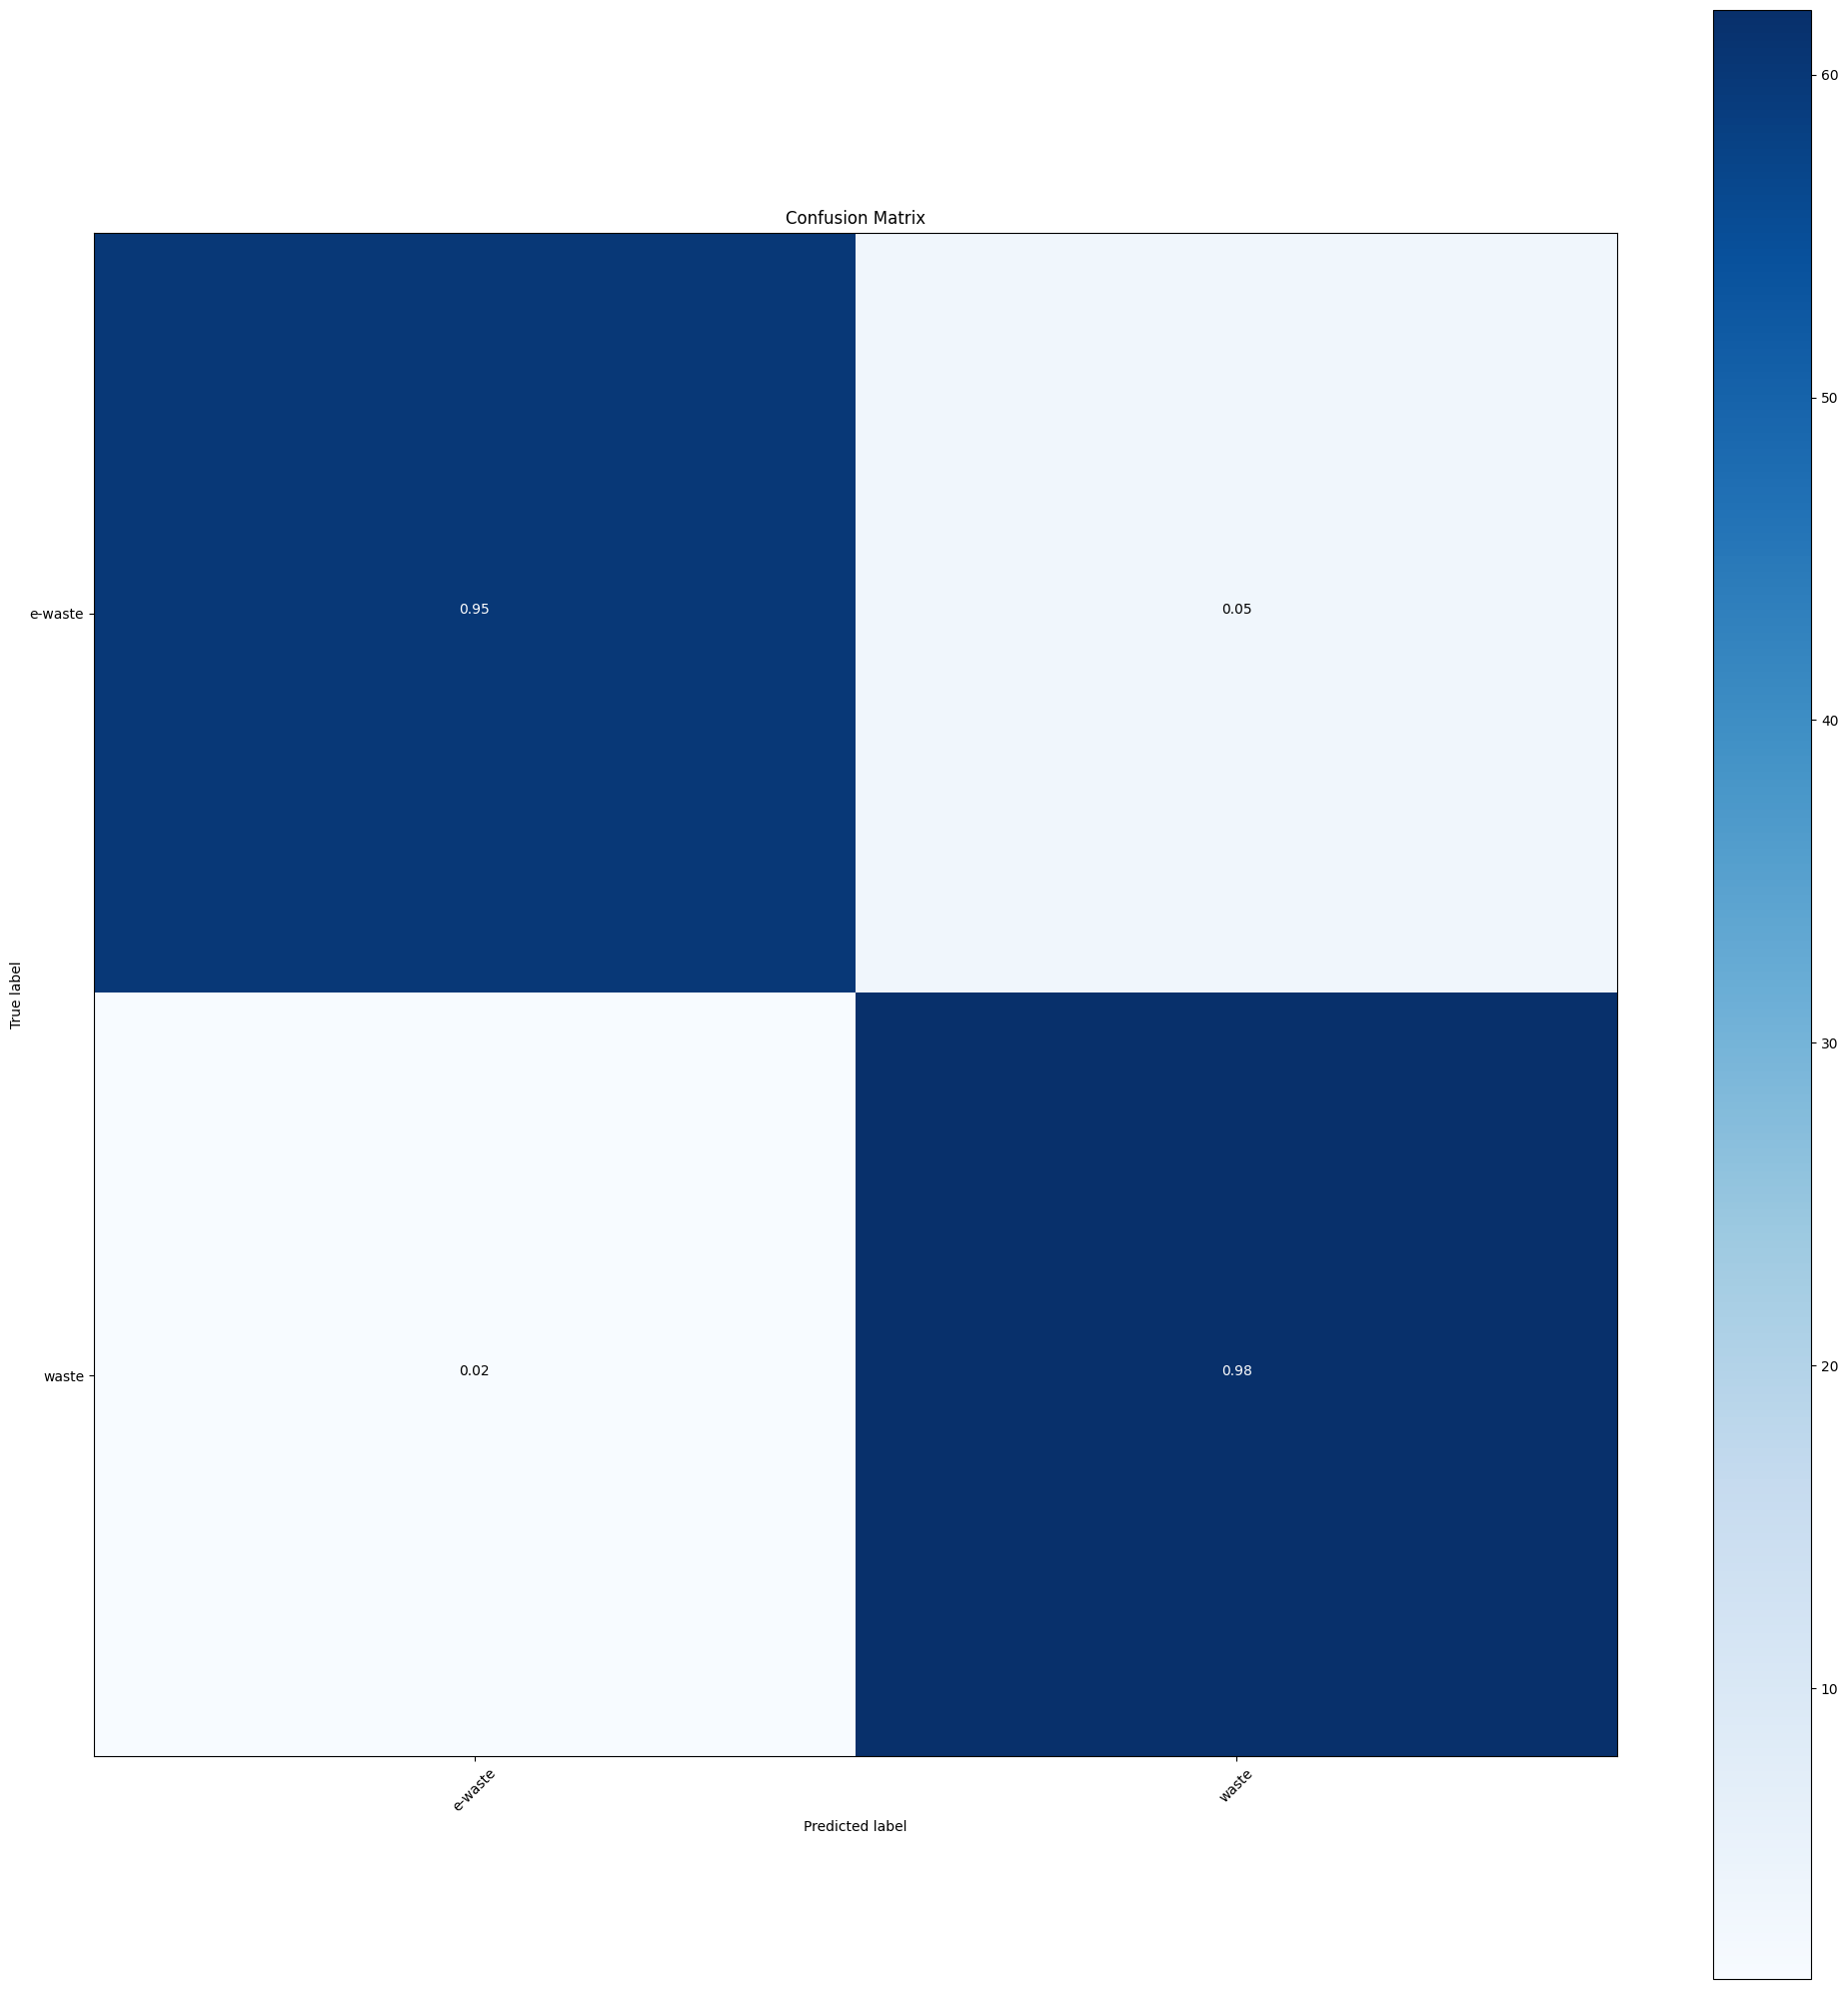

In [28]:
#Plot the confusion matrix. Set Normalize = True/False
import numpy as np
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model.predict_generator(test_generator, len(test_generator))
y_pred = Y_pred>=0.5
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

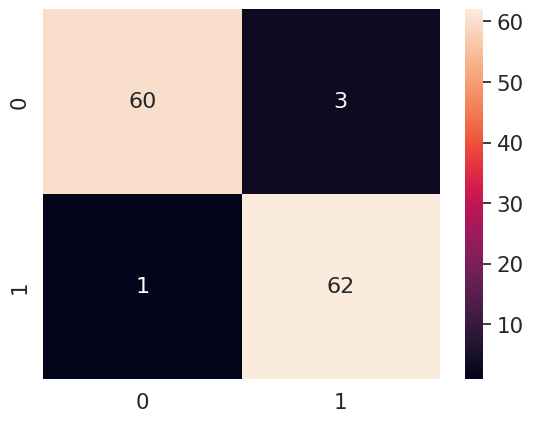

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_true = test_generator.classes
confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(confusion_matrix(y_true, y_pred), range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

In [31]:
y_pred = 1* y_pred
predicted_class_indices = np.reshape(y_pred, len(test_generator), order='F')
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [32]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

Tinggal deployment nya mau ke apa 

Saving b-plastic-a-20190613.jpg to b-plastic-a-20190613.jpg
1/1 [==============================] - 0s 154ms/step
1.00


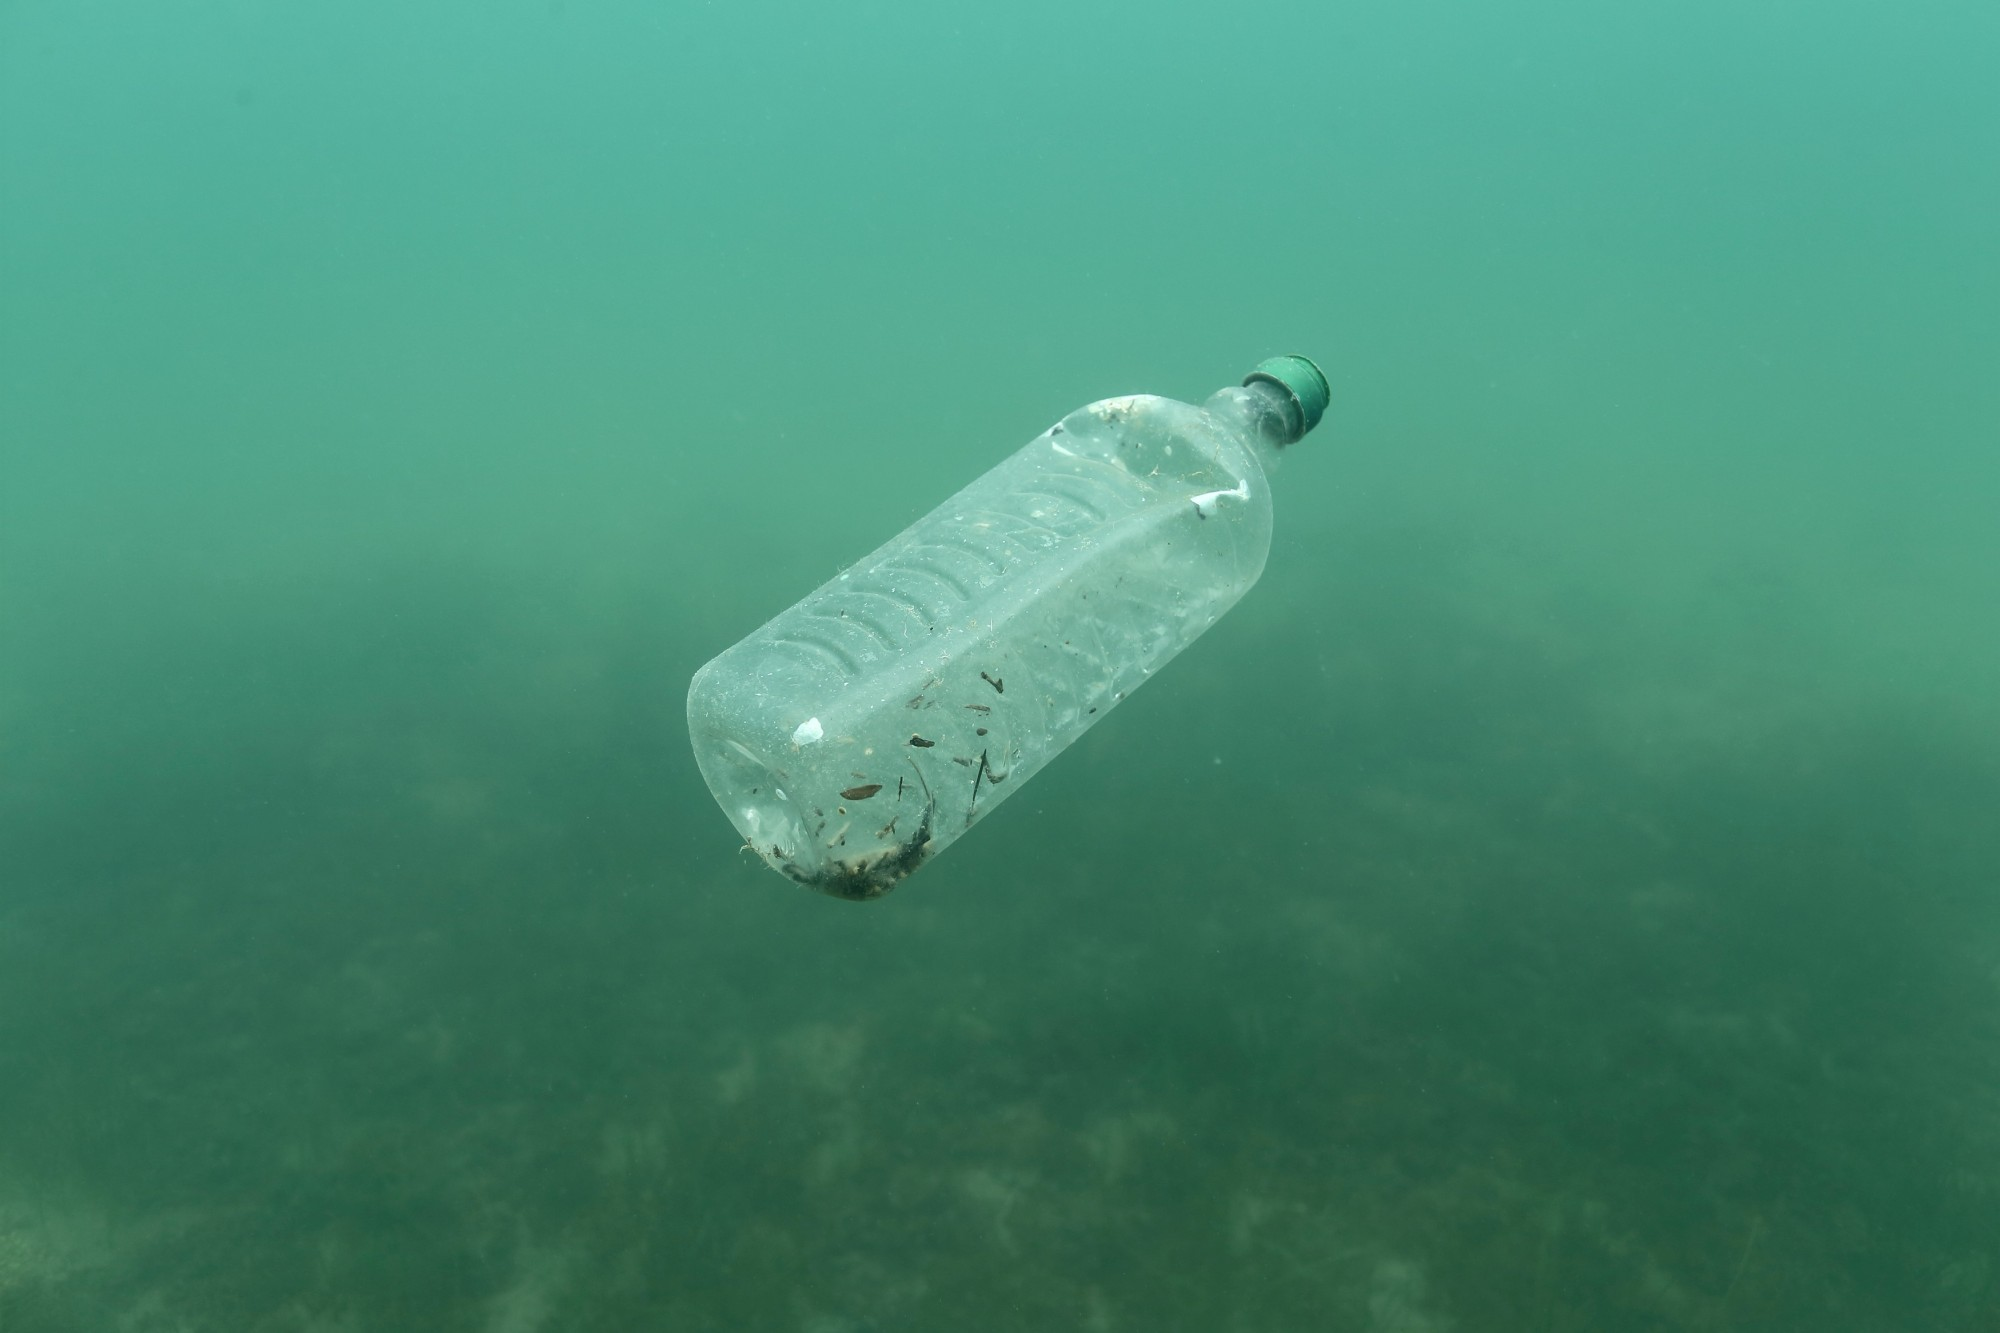

b-plastic-a-20190613.jpg is not an e-waste, you can't send to collector


In [33]:
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, array_to_img

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(256, 256))
  x = array_to_img(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print("%.2f" % classes[0])
  
  from IPython.display import Image
  display(Image(filename=fn))
  
  if classes[0]>0.5:
    print(fn + " is not an e-waste, you can't send to collector")
    
  else:
    print(fn + " is an e-waste, you can send to collector")

In [34]:
# EXERCISE: Save the trained model as a Keras HDF5 file. 

saved_model_path = "./my_model.h5"

# YOUR CODE HERE
model.save(saved_model_path) 

Deploymwnt to tflite

In [35]:
from absl import logging
logging.set_verbosity(logging.ERROR)


In [36]:
export_dir = './saved_model/1'

tf.saved_model.save(model, export_dir)

In [37]:
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [38]:
# EXERCISE: Use the TFLiteConverter SavedModel API to initialize the converter
# UNQ_C5
# GRADED CODE: save_model

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization] 

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [39]:
import pathlib
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

255752

In [40]:
!rm -rf ./Recycling-Image-Classification
!rm -rf ./data
!rm -rf ./e-waste.zip
!rm -rf ./e-waste_dataset.zip